**So the new implementation of lstm begins**

In [ ]:
import numpy as np
import torch
from torch import nn, optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch


In [ ]:
# device = (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
# print(f"Using {device} device")

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)


100%|██████████| 26421880/26421880 [00:06<00:00, 4159085.57it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 300567.13it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1195390.54it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16173990.26it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



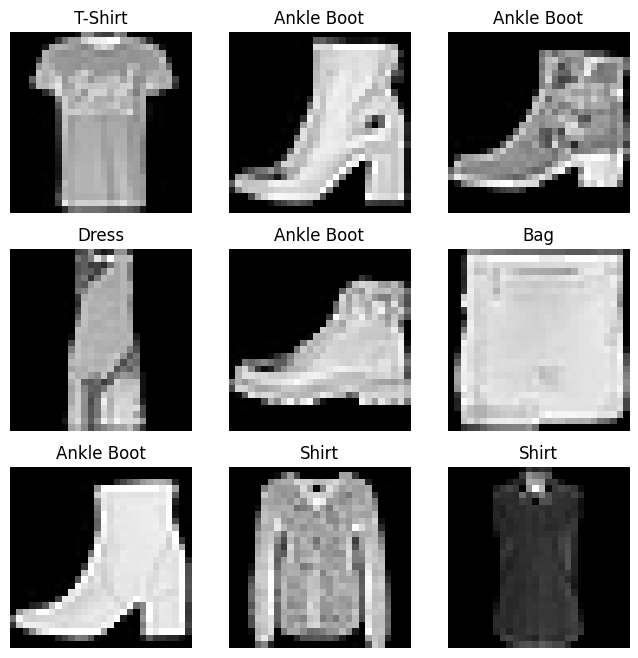

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
#creating dataloaders for preprocessing, loading and everything else
batch_size = 128
train_dataloader = DataLoader(training_data, batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size, shuffle=True)

In [1]:
from collections.abc import Sequence
#define hyperparameters

sequence_len = 28
input_len = 28
hidden_size = 128
num_layers = 4      #num_layers = 2 gives the better result
num_classes = 10    #find this number yourself from datasets for more customizability.
num_epoch = 5
learning_rate = 0.01

In [ ]:
# class lstm_net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.flatten = nn.Flatten()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(28*28, 512),
#             nn.ReLU(),
#             nn.Linear(512, 512),
#             nn.ReLU(),
#             nn.Linear(512, 10),
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits

#**Getting little confusing from here**

In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_len, hidden_size, num_classes, num_layers):
    super(LSTM, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_len, hidden_size, num_layers, batch_first=True)
    self.output_layer = nn.Linear(hidden_size, num_classes)

  def forward(self, X):
    hidden_states = torch.zeros(self.num_layers, X.size(0), self.hidden_size)
    cell_states = torch.zeros(self.num_layers, X.size(0), self.hidden_size)

    out, _ = self.lstm(X, (hidden_states, cell_states))
    out = self.output_layer(out[:, -1, :])
    return out



In [ ]:
#setting model
model = LSTM(input_len, hidden_size, num_classes, num_layers)
print(model)

LSTM(
  (lstm): LSTM(28, 128, num_layers=4, batch_first=True)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
#loss and optimizer

loss_func = nn.CrossEntropyLoss()
sgd = optim.SGD(model.parameters(), lr=learning_rate)
adam = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def train(num_epoch, model, train_dataloader, loss_func, optimizer):
    total_steps = len(train_dataloader)

    for epoch in range(num_epoch):
        for batch, (images, labels) in enumerate(train_dataloader):
          images = images.reshape(-1, sequence_len, input_len)

          output = model(images)
          loss = loss_func(output, labels)

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          if (batch+1)%100 == 0:
                print(f"Epoch: {epoch+1}; Batch {batch+1} / {total_steps}; Loss: {loss.item():>4f}")

In [ ]:
train(num_epoch, model, train_dataloader, loss_func, adam)

Epoch: 1; Batch 100 / 469; Loss: 1.011621
Epoch: 1; Batch 200 / 469; Loss: 0.694762
Epoch: 1; Batch 300 / 469; Loss: 0.567629
Epoch: 1; Batch 400 / 469; Loss: 0.601584
Epoch: 2; Batch 100 / 469; Loss: 0.545474
Epoch: 2; Batch 200 / 469; Loss: 0.424634
Epoch: 2; Batch 300 / 469; Loss: 0.538190
Epoch: 2; Batch 400 / 469; Loss: 0.474898
Epoch: 3; Batch 100 / 469; Loss: 0.432619
Epoch: 3; Batch 200 / 469; Loss: 0.439568
Epoch: 3; Batch 300 / 469; Loss: 0.435243
Epoch: 3; Batch 400 / 469; Loss: 0.529001
Epoch: 4; Batch 100 / 469; Loss: 0.286849
Epoch: 4; Batch 200 / 469; Loss: 0.366803
Epoch: 4; Batch 300 / 469; Loss: 0.503217
Epoch: 4; Batch 400 / 469; Loss: 0.398564
Epoch: 5; Batch 100 / 469; Loss: 0.367153
Epoch: 5; Batch 200 / 469; Loss: 0.383920
Epoch: 5; Batch 300 / 469; Loss: 0.379260
Epoch: 5; Batch 400 / 469; Loss: 0.285139


In [ ]:
test_images, test_labels = next(iter(test_dataloader))
test_labels

tensor([4, 3, 8, 2, 8, 6, 4, 2, 9, 7, 1, 4, 3, 5, 9, 4, 2, 3, 2, 0, 1, 7, 4, 7,
        1, 6, 8, 2, 8, 5, 9, 1, 5, 7, 6, 5, 5, 5, 9, 8, 9, 7, 9, 5, 7, 1, 3, 3,
        1, 9, 3, 0, 4, 8, 3, 0, 6, 7, 2, 3, 4, 2, 3, 1, 4, 9, 0, 1, 9, 7, 8, 3,
        5, 6, 7, 4, 7, 1, 5, 8, 7, 2, 4, 7, 7, 6, 4, 8, 7, 3, 4, 7, 4, 4, 1, 7,
        7, 7, 0, 5, 0, 6, 0, 3, 4, 8, 0, 5, 1, 3, 1, 3, 4, 8, 8, 5, 2, 0, 5, 4,
        2, 3, 8, 3, 7, 3, 5, 8])

In [ ]:
test_output = model(test_images.view(-1, 28, 28))

In [ ]:
predicted = torch.max(test_output, 1)[1]
predicted

tensor([4, 3, 8, 2, 3, 6, 4, 2, 9, 7, 1, 4, 6, 5, 9, 4, 2, 3, 2, 0, 0, 7, 4, 7,
        1, 6, 8, 2, 8, 5, 9, 1, 5, 7, 2, 5, 5, 9, 9, 8, 9, 7, 9, 5, 7, 1, 3, 3,
        1, 9, 3, 0, 4, 8, 4, 0, 6, 7, 2, 3, 6, 2, 3, 1, 4, 9, 0, 1, 9, 7, 8, 3,
        5, 0, 7, 4, 7, 1, 5, 8, 7, 2, 4, 7, 7, 2, 1, 8, 7, 3, 4, 7, 3, 4, 1, 7,
        7, 7, 0, 5, 0, 0, 0, 3, 4, 8, 0, 9, 1, 0, 1, 3, 4, 5, 8, 5, 2, 0, 5, 4,
        2, 3, 8, 3, 7, 3, 9, 8])

In [ ]:
correct = [1 for i in range(100) if predicted[i] == test_labels[i]]


In [ ]:
percentage_correct = sum(correct)/100

In [ ]:
print(percentage_correct)

0.89


In [ ]:
def test_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            # reshape images
            X = X.reshape(-1, 28, 28)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")
    return 100*correct

In [ ]:
test_loop(test_dataloader, model, loss_func, adam)

Test Error:
 Accuracy: 86.1%, Avg loss: 0.383567



86.09

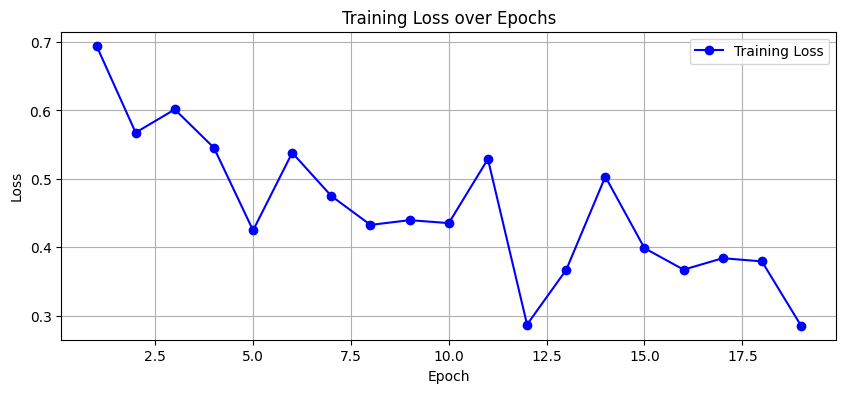

In [ ]:
import matplotlib.pyplot as plt

# Example list of loss values (replace with your actual data)
losses =[0.694762,
0.567629,
0.601584,
0.545474,
0.424634,
0.538190,
0.474898,
0.432619,
0.439568,
0.435243,
0.529001,
0.286849,
0.366803,
0.503217,
0.398564,
0.367153,
0.383920,
0.379260,
0.285139
]

# Generate x-axis values (epochs or iterations)
epochs = range(1, len(losses) + 1)

# Plotting the losses
plt.figure(figsize=(10, 4))  # Optional: Adjust figure size
plt.plot(epochs, losses, marker='o', linestyle='-', color='b', label='Training Loss')

# Adding labels and title
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()
